In [524]:
import numpy as np
import matplotlib.pyplot as plt

In [525]:
def get_raw_pattern(angle_grid,type):
    """
    Initial patterns of the antenna elements
    """
    d2r = np.pi/180
    if type == "uniform":
        F = np.ones(len(angle_grid))
    elif type == "cos1":
        F = np.cos(0.5*angle_grid*d2r)**2
    elif type == "cos2":
        F = np.cos(angle_grid*d2r)**2
    elif type == "cos3":
        F = np.abs(np.cos(angle_grid*d2r))
    elif type == "cos4":
        F = np.cos(angle_grid*d2r)**32
    else:
        None

    # pattern normalization
    # F = F / np.sqrt(np.sum(np.abs(F)**2))
    return F

In [526]:
angles = np.arange(0,361,1)

In [527]:
def plot_pattern_polar_lin(phi, r, title):
    plt.title(title)
    plt.polar(phi,r)

def plot_pattern_polar_dB(phi, r, title):
    plt.title(title)
    plt.polar(phi,10*np.log10(r))

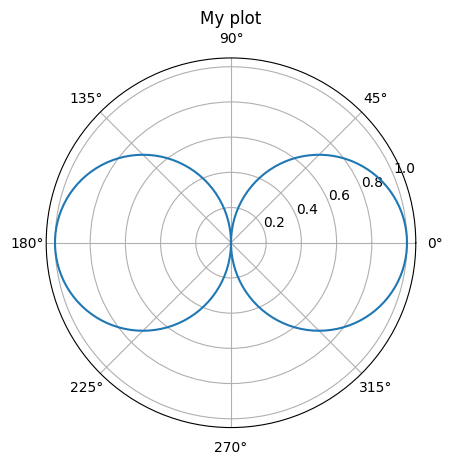

In [528]:
F_tx = get_raw_pattern(angles,"cos3")
d2r=np.pi/180

plt.subplot(projection = 'polar')
plot_pattern_polar_lin(angles*d2r,F_tx,"My plot")
plt.show()

In [529]:
AOD = 10
Ntx = 8

In [530]:
m_tx = F_tx[AOD]
M_tx=np.tile(m_tx,[Ntx,1])
print(M_tx,M_tx.shape)

[[0.98480775]
 [0.98480775]
 [0.98480775]
 [0.98480775]
 [0.98480775]
 [0.98480775]
 [0.98480775]
 [0.98480775]] (8, 1)


In [531]:
sample_rate = 1e6
N = 10000 # number of samples to simulate

# Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate # time vector
f_tone = 0.02e6
signal = np.exp(2j * np.pi * f_tone * t)

d = 0.5 # half wavelength spacing
theta_degrees = AOD # AOD - angle of departure in degrees
theta = theta_degrees*d2r # convert to radians
a = np.exp(-2j * np.pi * d * np.arange(Ntx) * np.sin(theta)) # array factor
a=a.reshape(-1,1)
print(a, a.shape)

[[ 1.        +0.j        ]
 [ 0.85485145-0.51887281j]
 [ 0.46154202-0.88711835j]
 [-0.06575172-0.99783601j]
 [-0.57395793-0.81888479j]
 [-0.91554582-0.40221369j]
 [-0.99135342+0.13121887j]
 [-0.77937401+0.62655898j]] (8, 1)


In [532]:
AR = a * M_tx # array response = basic array response * element radiation pattern
print(AR, AR.shape)

[[ 0.98480775+0.j        ]
 [ 0.84186434-0.51098996j]
 [ 0.45453016-0.87364103j]
 [-0.0647528 -0.98267664j]
 [-0.56523822-0.80644409j]
 [-0.90163662-0.39610316j]
 [-0.97629254+0.12922536j]
 [-0.76753357+0.61704014j]] (8, 1)


In [533]:
print(AR.shape)
signal = signal.reshape(-1,1).T   
print(signal.shape) # 1x10000

# matrix multiply
r = np.kron(AR,signal)
print(r.shape) # 4x10000.  r is now going to be a 2D array, 1D is time and 1D is the spatial dimension

# n = np.random.randn(Ntx, N) + 1j*np.random.randn(Ntx, N)
# r = r + 0.1*n # r and n are both 3x10000

(8, 1)
(1, 10000)
(8, 10000)


In [534]:
# w = np.exp(-2j * np.pi * d * np.arange(N_tx) * np.sin(AOD*d2r)) # Conventional, aka delay-and-sum, beamformer
# w=w.reshape(-1,1)
# r = w.conj().T @ r # example of applying the weights to the received signal (i.e., perform the beamforming)
# print(r.shape)

In [535]:
angles = np.arange(0,361,1)

In [536]:
results = []
for angle in angles:
    w = np.exp(-2j * np.pi * d * np.arange(Ntx) * np.sin(angle*d2r)) # Conventional, aka delay-and-sum, beamformer
    w=w.reshape(-1,1)/np.linalg.norm(w) # reshape and norm our precoder
    r_weighted = w.conj().T @ r # apply our weights. remember r is 3x10000
    results.append((np.mean(np.abs(r_weighted)**2))) # power in signal, in dB so its easier to see small and large lobes at the same time
#results -= np.max(results) # normalize

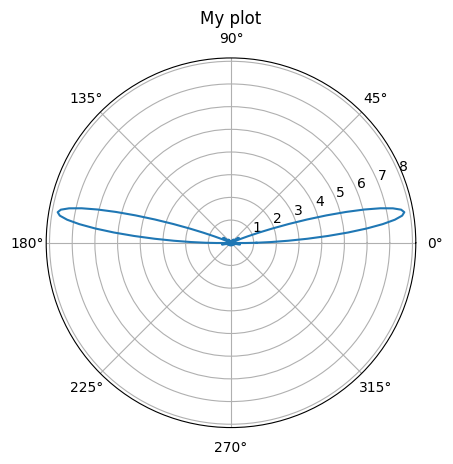

In [537]:
plt.subplot(projection = 'polar')
plot_pattern_polar_lin(angles*d2r,np.array(results),"My plot")
plt.show()